In [1]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt 
# import cv2
from os import path 
import time
print("started")

2023-05-08 23:12:22.705748: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 23:12:24.973534: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/abk/miniconda3/envs/tf/lib/
2023-05-08 23:12:24.973770: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/abk/miniconda3/envs/tf/lib/
2023-05-08 23:12:24.973780: W tensorflow/compiler/tf2tensorr

started


In [2]:
datasets_folder = "/media/abk/DATA 2/dataset/main_project_updated/datasets"

batch_size = 64
img_height = 180
img_width = 180

In [3]:
color_mode = "grayscale"
train_ds = keras.utils.image_dataset_from_directory(
    datasets_folder,
    validation_split=0.2,
    subset="training",
    seed=123,
    color_mode=color_mode,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 6978 files belonging to 5 classes.
Using 5583 files for training.


2023-05-08 23:12:28.112776: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-08 23:12:28.154782: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-08 23:12:28.155113: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-08 23:12:28.156998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [4]:

val_ds = keras.utils.image_dataset_from_directory(
    datasets_folder,
    validation_split=0.2,
    subset="validation",
    seed=123,
    color_mode=color_mode,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 6978 files belonging to 5 classes.
Using 1395 files for validation.


['bird', 'elephant', 'person', 'undetected', 'wild_boar']


2023-05-08 23:12:30.825107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-05-08 23:12:32.133036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


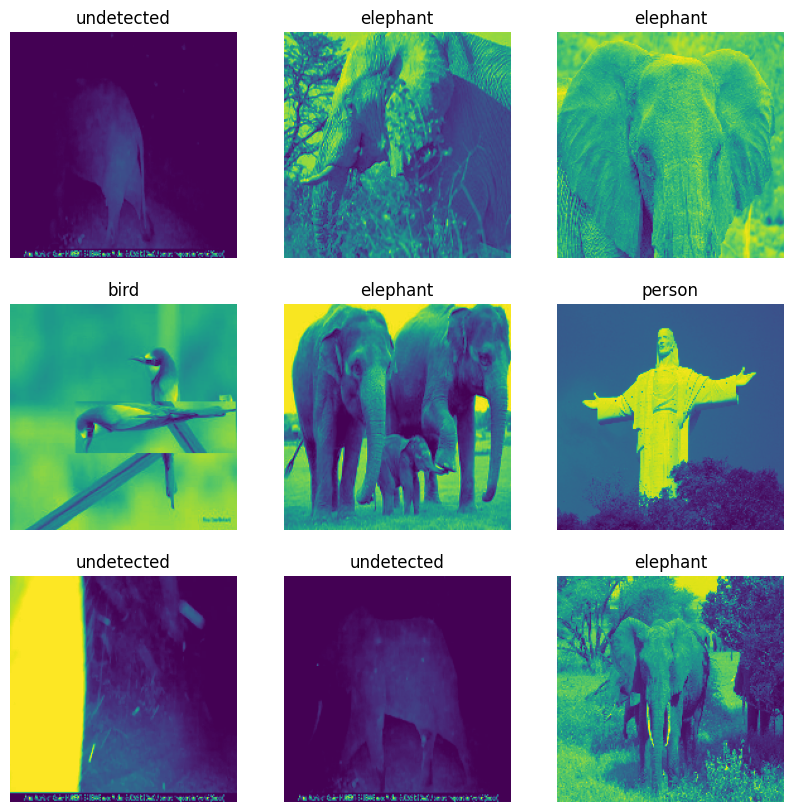

In [5]:
class_names = train_ds.class_names 
print(class_names)
class_len = len(class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    

In [6]:
AUTOTUNE = tf.data.AUTOTUNE 
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
model = keras.models.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(img_height,img_width,1)),
    keras.layers.Conv2D(16,3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(class_len , activation='softmax')
])

model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=keras.metrics.SparseCategoricalAccuracy())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        1

In [8]:
epochs =  35
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs , verbose=1)

Epoch 1/15


2023-05-08 23:12:42.688955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-05-08 23:12:42.814124: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-05-08 23:12:51.999530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-05-08 23:12:53.047643: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 10 of 1000
2023-05-08 23:12:54.819290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-05-08 23:12:56.548576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-05-08 23:13:02.495031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-05-08 23:13:03.243314: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 19 of 1000
2023-05-

88/88 [==============================] - ETA: 0s - loss: 1.2331 - sparse_categorical_accuracy: 0.4876

2023-05-08 23:14:22.637258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-05-08 23:14:23.687358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-05-08 23:14:26.931526: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-05-08 23:14:32.992938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-05-08 23:14:33.565396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-05-08 23:14:34.163823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-05-08 23:14:36.707453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/88 [==============================] - 123s 362ms/step - loss: 1.2331 - sparse_categorical_accuracy: 0.4876 - val_loss: 0.9425 - val_sparse_categorical_accuracy: 0.6401
Epoch 2/15
88/88 [==============================] - 6s 66ms/step - loss: 0.8884 - sparse_categorical_accuracy: 0.6488 - val_loss: 0.9319 - val_sparse_categorical_accuracy: 0.6559
Epoch 3/15
88/88 [==============================] - 6s 67ms/step - loss: 0.7259 - sparse_categorical_accuracy: 0.7163 - val_loss: 0.7567 - val_sparse_categorical_accuracy: 0.7147
Epoch 4/15
88/88 [==============================] - 6s 67ms/step - loss: 0.5551 - sparse_categorical_accuracy: 0.7928 - val_loss: 0.7498 - val_sparse_categorical_accuracy: 0.7290
Epoch 5/15
88/88 [==============================] - 6s 67ms/step - loss: 0.4322 - sparse_categorical_accuracy: 0.8359 - val_loss: 0.7209 - val_sparse_categorical_accuracy: 0.7505
Epoch 6/15
88/88 [==============================] - 6s 68ms/step - loss: 0.2906 - sparse_categorical_accuracy: 0.

In [9]:
acc = history.history['val_sparse_categorical_accuracy']
print(acc)
final_acc = acc[len(acc) - 1]

#only if to save the model
model.save(f"m-(e-{epochs})-{round(final_acc,4)}.h5")

[0.6401433944702148, 0.6559139490127563, 0.7146953344345093, 0.7290322780609131, 0.750537633895874, 0.7498207688331604, 0.7799283266067505, 0.7670251131057739, 0.7899641394615173, 0.7677419185638428, 0.7541218400001526, 0.7534050345420837, 0.7713261842727661, 0.774193525314331, 0.7792114615440369]


1/1 [==============================] - 0s 203ms/step
animal : bird | accuracy :  0.0
animal : elephant | accuracy :  99.97
animal : person | accuracy :  0.03
animal : undetected | accuracy :  0.0
animal : wild_boar | accuracy :  0.0


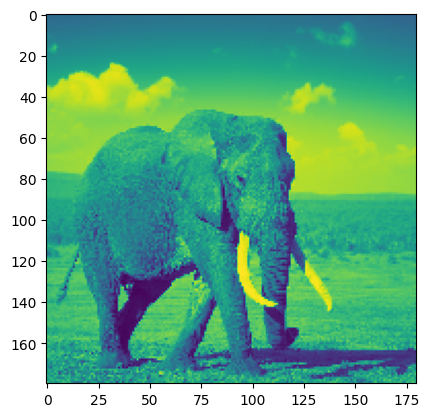

In [10]:
img = tf.keras.utils.load_img(
    "test/e2.jpg",
    target_size = (img_height,img_width),
    color_mode = color_mode 
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = predictions[0]

print(f"animal : {class_names[0]} | accuracy :  {round(np.array(score)[0] * 100,2)}")
print(f"animal : {class_names[1]} | accuracy :  {round(np.array(score)[1] * 100,2)}")
print(f"animal : {class_names[2]} | accuracy :  {round(np.array(score)[2] * 100,2)}")
print(f"animal : {class_names[3]} | accuracy :  {round(np.array(score)[3] * 100,2)}")
print(f"animal : {class_names[4]} | accuracy :  {round(np.array(score)[4] * 100,2)}")
plt.imshow(img)

1/1 [==============================] - 0s 26ms/step


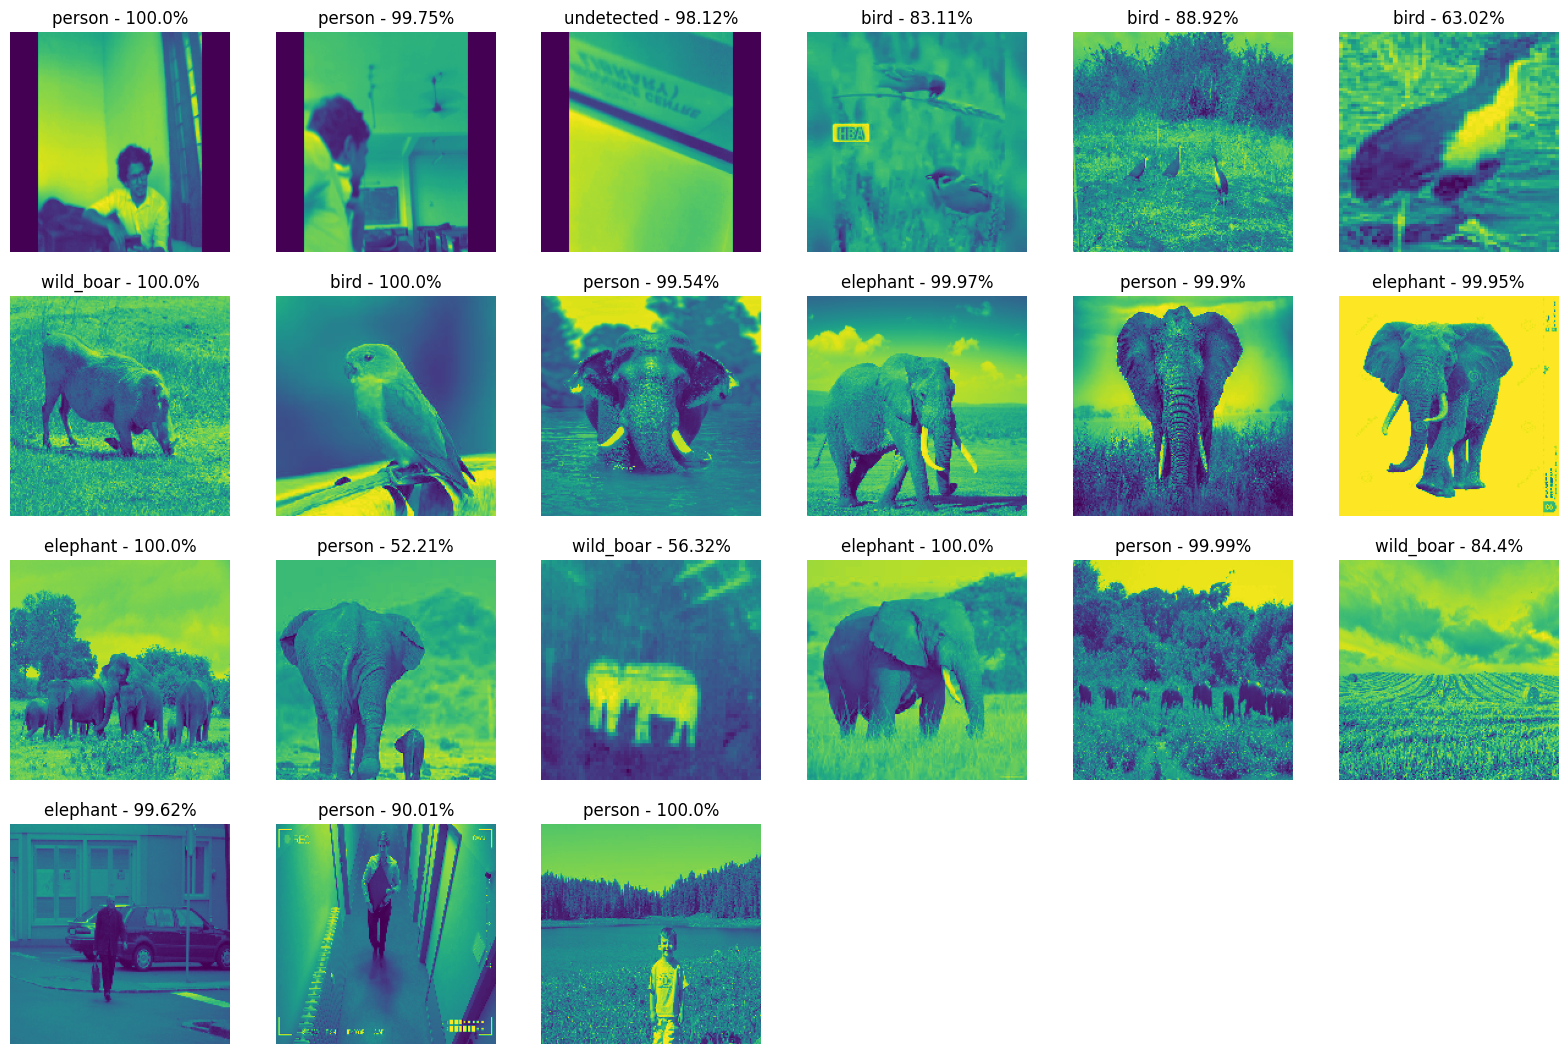

In [11]:

import os
plt.figure(figsize=(20, 20))

for i,file in enumerate(os.listdir('test')):
    img = tf.keras.utils.load_img(
    f'test/{file}',
    target_size = (img_height,img_width),
    color_mode = color_mode 
    )


    img_array = tf.keras.utils.img_to_array(img)

    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    score = predictions[0]
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(img)
    s = round(np.array(score)[0] * 100,2) 
    plt.title(f"{class_names[score.argmax()]} - {round(np.max(score) * 100,2)}%" )
    plt.axis("off")